In [1]:
import pandas as pd
import numpy as np


In [6]:
df = pd.read_csv('Desktop/Thinkful/heart.csv')

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [13]:
df.isnull().sum()*100/len(df)

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

# Defining X and y

In [22]:
X = df.drop('target', 1)
Y = df['target']

# Decicion Tree

In [32]:
# This is the model we'll be using.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz
import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

## Iteration 1

In [45]:
# timing
start_time = time.time()
# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=5,
    random_state = 1337
)
decision_tree.fit(X, Y)

#Cross-validate using 10 folds.
score = cross_val_score(decision_tree, X, Y, cv=10)

print('Cross validation Score is ', score.mean())
print("--- %s seconds ---" % (time.time() - start_time))
#print('Mean:', score.mean(), '\nVariance:', score.std()*2)

Cross validation Score is  0.6768557656655544
--- 0.08336114883422852 seconds ---


Using depth = 5, the decision tree model preformed only with an accuracy rate of 67%

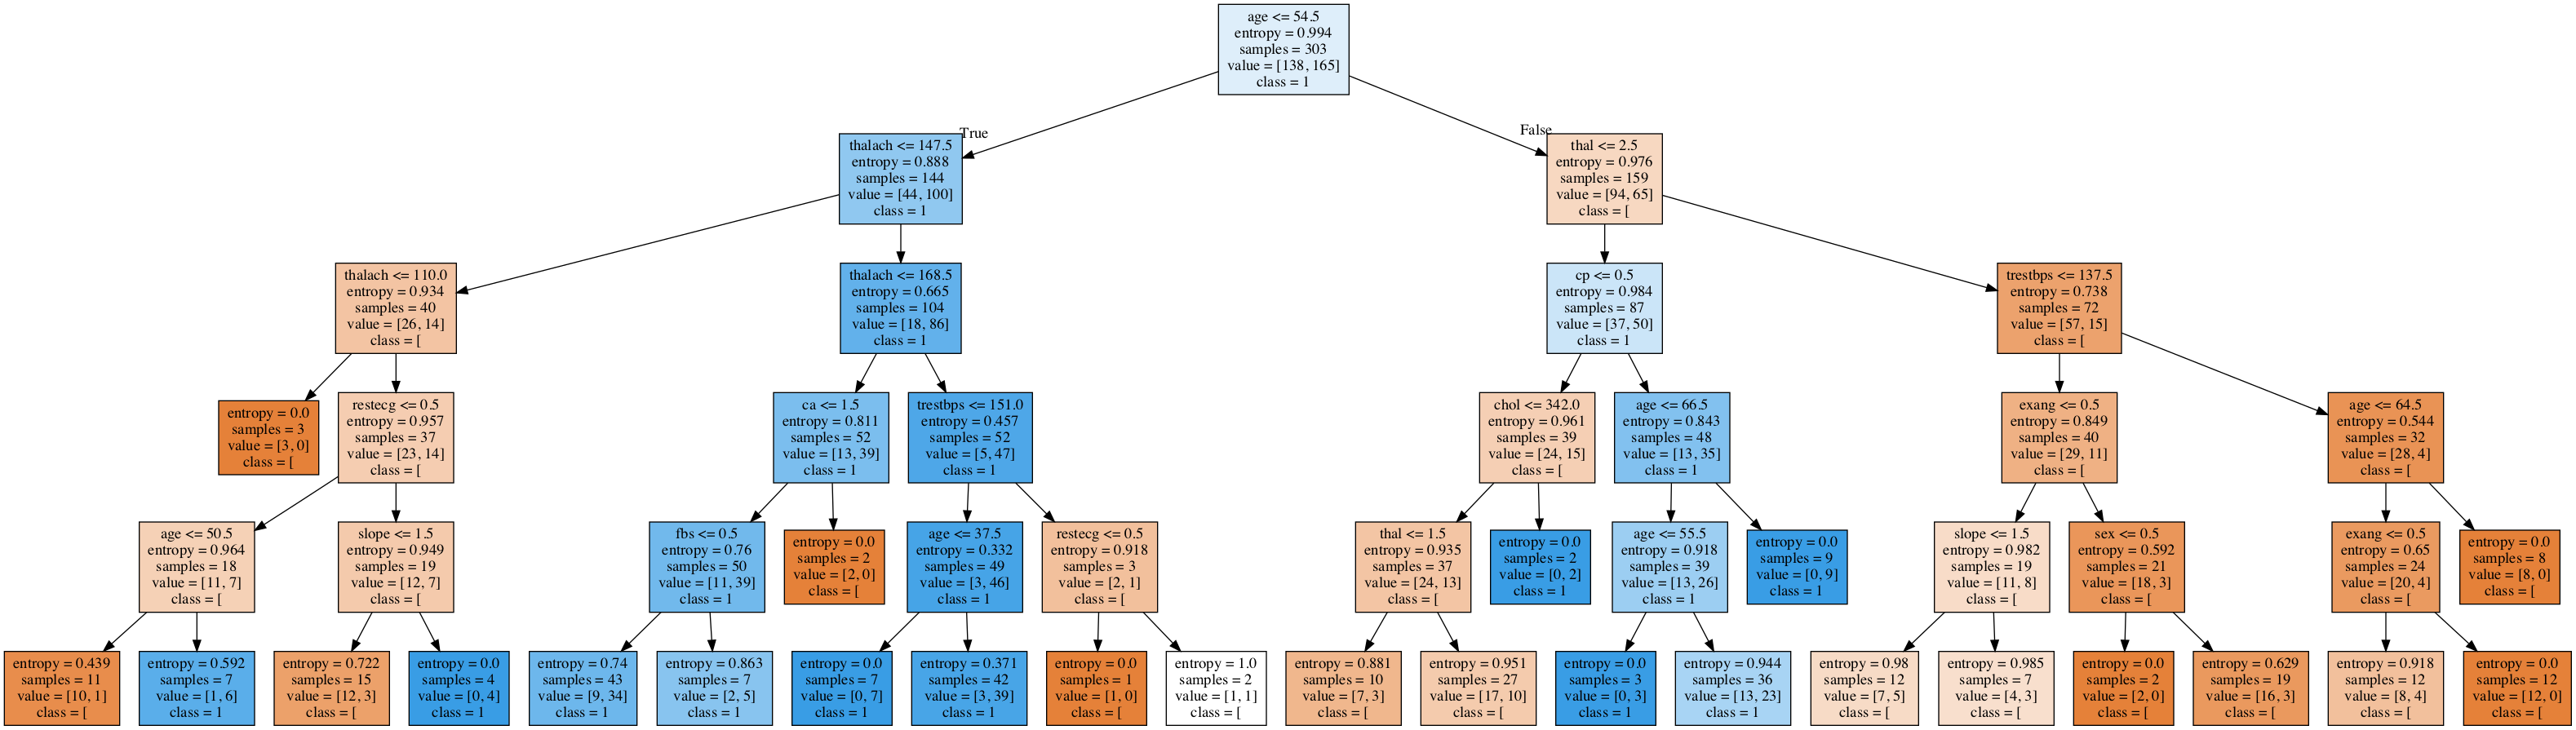

In [46]:
# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    class_names=str(Y.unique()),
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Iteration 1

In [52]:
# timing
start_time = time.time()
# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=7,
    random_state = 1337
)
decision_tree.fit(X, Y)

#Cross-validate using 10 folds.
score = cross_val_score(decision_tree, X, Y, cv=10)

print('Cross validation Score is ', score.mean())
print("--- %s seconds ---" % (time.time() - start_time))
#print('Mean:', score.mean(), '\nVariance:', score.std()*2)

Cross validation Score is  0.7229922135706341
--- 0.06701111793518066 seconds ---


By increasing the max depth to 7, we increased the accuracy score to 72%.

# Random Forest

In [56]:
from sklearn import ensemble

## Iteration 1

In [58]:
# timing
start_time = time.time()


clf = ensemble.RandomForestClassifier(n_estimators = 1000, random_state = 0, n_jobs = -1)

# Train the classifier
clf.fit(X, Y)

score = cross_val_score(clf, X, Y, cv=10)
print('Cross validation Score is ', score.mean())
print("--- %s seconds ---" % (time.time() - start_time))

Cross validation Score is  0.8304338153503894
--- 12.26574420928955 seconds ---


Now will try Gini

In [59]:
# timing
start_time = time.time()


clf = ensemble.RandomForestClassifier(criterion='gini',
    max_features='log2',
    max_depth=None,
    n_estimators=150)

# Train the classifier
clf.fit(X, Y)

score = cross_val_score(clf, X, Y, cv=10)
print('Cross validation Score is ', score.mean())
print("--- %s seconds ---" % (time.time() - start_time))

Cross validation Score is  0.8204189840563589
--- 1.395354986190796 seconds ---


## Iteration 3

In [60]:
# timing
start_time = time.time()


clf = ensemble.RandomForestClassifier(criterion='gini',
    max_features='log2',
    max_depth=5,
    n_estimators=150)

# Train the classifier
clf.fit(X, Y)

score = cross_val_score(clf, X, Y, cv=10)
print('Cross validation Score is ', score.mean())
print("--- %s seconds ---" % (time.time() - start_time))

Cross validation Score is  0.8371078976640712
--- 1.3271868228912354 seconds ---


## Iteration 4

In [61]:
# timing
start_time = time.time()


clf = ensemble.RandomForestClassifier(criterion='gini',
    max_features='log2',
    max_depth=7,
    n_estimators=150)

# Train the classifier
clf.fit(X, Y)

score = cross_val_score(clf, X, Y, cv=10)
print('Cross validation Score is ', score.mean())
print("--- %s seconds ---" % (time.time() - start_time))

Cross validation Score is  0.8369929551353354
--- 1.3876121044158936 seconds ---


# Conclusion
Random forest was able to predict with higher accuracy score than Decision tree. Although it took substantially longer to load than a decision tree.